## Regressão Linear
#### Importando as bibliotecas necessárias

In [1]:
import numpy as np                # funções matemáticas
import pandas as pd               # trabalhar com tabelas e import de arquivos
import seaborn as sns             # biblioteca para gráficos
import plotly.express as px       # biblooteca para gráficos dinâmicos

#### Importando arquivo

In [2]:
base_de_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep=';')

In [3]:
base_de_custo_diaria

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735
5,15,859
6,18,989
7,22,1075
8,25,1500
9,30,1850


In [4]:
 base_de_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


#### Criando as variáveis para esse modelo

In [5]:
# criando variável Independente
x_custo_diaria = base_de_custo_diaria.iloc[:,0].values
x_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50],
      dtype=int64)

In [6]:
# criando variável Dependente (o que quero predizer)
y_custo_diaria = base_de_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680], dtype=int64)

In [7]:
np.corrcoef(x_custo_diaria,y_custo_diaria)     # mostra uma matriz

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

#### Correlação


<Axes: >

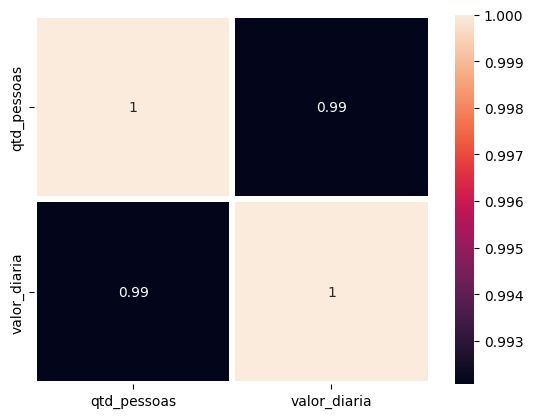

In [8]:
correlation = base_de_custo_diaria.corr()
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot=True, linewidths=3)
plot

#### Tratando os dados para o modelo

In [9]:
x_custo_diaria.shape

(15,)

In [10]:
x_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50],
      dtype=int64)

In [11]:
x_custo_diaria = x_custo_diaria.reshape(-1,1)
x_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]], dtype=int64)

In [12]:
x_custo_diaria.shape

(15, 1)

#### Aplicando os dados ao algoritimo de machine de regressão

In [13]:
from sklearn.linear_model import LinearRegression
# criando um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [14]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

#### Realizando o Treinamento do Modelo

In [15]:
previsao_custo_diaria.fit(x_custo_diaria,y_custo_diaria)

LinearRegression()

In [16]:
# verificando a interceptação
previsao_custo_diaria.intercept_

155.91874556932044

In [17]:
# verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([48.61472504])

In [18]:
# baseado nos valores de nº de pessoas, vamos prever o custo do imovel alugado
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria) 

In [19]:
# visualização das previsões para cada nº de pessoas
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

#### Visualizando no Gráfico as disposições dos dados

In [20]:
# verificando o tipo de variável 
x_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]], dtype=int64)

In [21]:
# tranformando em um vetor ravel()

In [22]:
x_custo_diaria.ravel()

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50],
      dtype=int64)

In [23]:
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680], dtype=int64)

In [24]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [27]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_precos, name= 'Previsões')
grafico.show()

In [31]:
# verificando o valor de uma determinada previsão baseada na quantidade de pessoas
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([350.37764575])

In [32]:
qtd_pessoas = 8
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([544.83654593])

In [33]:
# verificando de modo direto
previsao_custo_diaria.predict([[8]])

array([544.83654593])

In [44]:
# verificando a qualidade do algoritmo (quanto mais próximo de 1, melhor a qualidade do algoritmo)
score = previsao_custo_diaria.score(x_custo_diaria,y_custo_diaria)
print(f"Acurácia de: {score}")

Acurácia de: 0.984200996064679


In [47]:
# visualizando os erros desse modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria,previsao_precos)

In [48]:
MSE

9989.829839426571

In [49]:
# calculando a MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

83.84480977618742

In [50]:
# calculando RMSE
np.sqrt(MSE)

99.9491362615334